In [ ]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here (double click to edit):

- Name 1: Hollie Gardner
- Name 2: Cleveland Johnson
- Name 3: Shelby Provost

________

# In Class Assignment Five
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook) before the end of class. Be sure to save the notebook before uploading.

<a id="top"></a>
## Contents
* <a href="#testing">Testing R Magics</a>
* <a href="#understand">Understanding the Data Representation</a>
* <a href="#apriori">Finding Frequent Items</a>
* <a href="#candidates">Generating Candidates</a>
* <a href="#arules">Using ARules and ARulesViz</a>

________________________________________________________________________________________________________

<a id="testing"></a>
<a href="#top">Back to Top</a>

## Running in the 'R' Ecosystem with magics
If you did not get Rpy2, R, or the dependencies arules and arulesViz installed on your system, then you will need to skip this part and go on to the first question. You will need to run the appropriate block of code in this notebook depending on if you have Rpy2 running or not. Each block is marked appropriately, so read the block before running it. 

In [1]:
# getting things started
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline



In [3]:
#==========================
#IF USING R, RUN THIS CODE
#==========================
# You will need to have R installed, as well as Rpy2 and the arules library
from rpy2.robjects.packages import importr
from rpy2 import robjects as robj


# this way we can write r code by simply writing %R
%load_ext rmagic
%load_ext rpy2.ipython 
# this enables the %R extension to iPython (does not work outside of the iPython shell)

# these packages will need to be installed
# open R and run 
#     install.package(arules)
#     install.package(arulesViz)
# , lib_loc='C:/Users/johnc45/R/R-Library'
arules = importr('arules', lib_loc='C:/Users/johnc45/R/R-Library') # same as importing in R with the "library" command
arules_viz = importr('arulesViz', lib_loc='C:/Users/johnc45/R/R-Library') # visualize the different rules

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


If you receive a warning on the above block, try to run it again and verify that everything is loaded properly.
___

In [4]:
#==========================
#IF USING R, RUN THIS CODE
#==========================

%R load('titanic2.raw.rdata')
%R rules <- apriori(titanic.raw,parameter = list(minlen=2, supp=0.05, conf=0.8))
%R rules.sorted <- sort(rules, by='lift')
%R plot(rules.sorted, method='grouped')


print('Arules run now from R, test complete')


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.05      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 110 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10 item(s), 2201 transaction(s)] done [0.01s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [49 rule(s)] done [0.01s].
creating S4 object  ... done [0.01s].


R[write to console]: Error in `levels<-`(`*tmp*`, value = as.character(levels)) : 
  factor level [14] is duplicated




Error in `levels<-`(`*tmp*`, value = as.character(levels)) : 
  factor level [14] is duplicated


RInterpreterError: Failed to parse and evaluate line "plot(rules.sorted, method='grouped')".
R error message: 'Error in `levels<-`(`*tmp*`, value = as.character(levels)) : \n  factor level [14] is duplicated'

___
<a id="understand"></a>
<a href="#top">Back to Top</a>
## Understanding the dataset
We have used the titanic dataset before in class, however this dataset has been pruned to only include the social class, sex, age (as a nominal), and if the individual survived. The data can be stored in many ways, but is stored here as a table of values. 

**Question**: Is this dataset a typical example of *transaction* data (*i.e.*, like the grocery store transaction data)? Why or Why not? What makes it similar or different? **Hint**: think about the possible itemset lattice and how it might be different/similar. What makes an item in this dataset?

___
Enter your answer here:

This data set is an example of transactional data.  This data set describes an event and is articulated using the a verb, in this case "survived".



___

<a id="apriori"></a>
<a href="#top">Back to Top</a>
## Frequent Itemsets and Apriori
Run the following line of code to grab the R loaded data.frame and save it into a pandas dataframe. 

Please run the appropriate block of code for whether you have Ry2 installed or not!

In [5]:
#==========================
#IF USING R, RUN THIS CODE
#==========================
# Use rmagics to save the dataframe into pandas
#(R output)(python var) ( this is all R code)
%R -o df_from_R df_from_R<-titanic.raw


# now we have the exact same dataset as the one from R
# but it is now a pandas dataframe
print(df_from_R.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2201 entries, 1 to 2201
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Class     2201 non-null   int32
 1   Sex       2201 non-null   int32
 2   Age       2201 non-null   int32
 3   Survived  2201 non-null   int32
dtypes: int32(4)
memory usage: 51.6+ KB
None


In [ ]:
#===============================
# IF NOT USING R RUN THIS CODE
#===============================
# getting things started
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

df_from_R = pd.read_csv('Rframe_as_pandas.csv')
df_from_R.info()


Text(0.5, 1.0, 'Support count for some 3-itemsets')

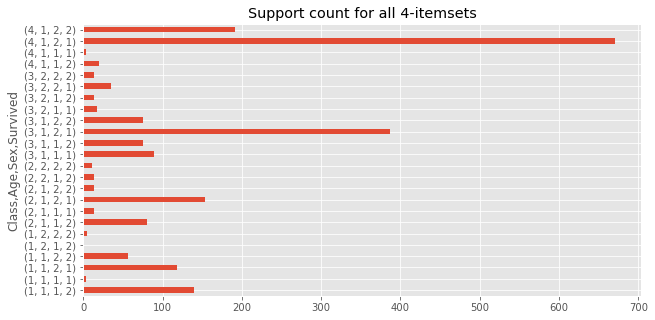

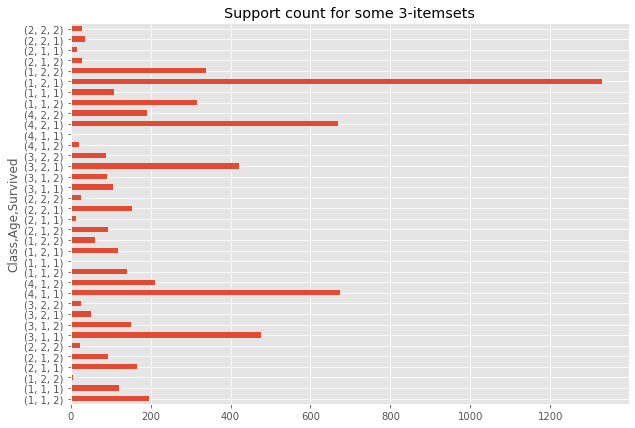

In [6]:
#==========================================
# RUN THIS CODE NO MATTER IF USING R OR NOT
#==========================================
plt.style.use('ggplot')

# Now lets plot the number of times each itemset occurs graphically
# find counts of the four itemsets
f = plt.figure(figsize=(10,5))
df_grouped = df_from_R.groupby(by=['Class','Age','Sex'])
ax = df_grouped.Survived.value_counts().plot(kind='barh')
plt.title('Support count for all 4-itemsets')

# find all the three itemsets and concat them
f = plt.figure(figsize=(10,7))
df_grouped = df_from_R.groupby(by=['Class','Age'])
countsA = df_grouped.Survived.value_counts()
df_grouped = df_from_R.groupby(by=['Class','Sex'])
countsB = df_grouped.Survived.value_counts()
df_grouped = df_from_R.groupby(by=['Age','Sex'])
countsC = df_grouped.Survived.value_counts()

pd.concat((countsA,countsB,countsC)).plot(kind='barh')
plt.title('Support count for some 3-itemsets')



Use the graphs above to estimate the values for the following quantities. You do not need to calculate counts from the dataset, just try to get close by viewing from the graph. Recall that for a given rule, $X\rightarrow Y$, the confidence is given by 
$$c=\frac{\sigma( X \cup Y)}{\sigma( X )} $$

**Questions**: Given the graphs above, what is the support count, $\sigma$, and support, $s$, for the itemset {1st, Adult, Yes}? What about the itemset {1st, Adult, Yes, Female}?

**Question**: What is the confidence, $c$, for the rule {1st, Adult, Yes} $\rightarrow$ {Female}? 

___
Enter your answer here:

{1st, Adult, Yes}
Support count = 200
Support = .091

{1st, Adult, Yes, Female}
Support count = 140
Support = .064


{1st, Adult, Yes} -> Female
confidence = 140/200 = .7




In [ ]:
# Insert any calculations needed to answer the above question here

200/2200

140/2200

140/200



___
**Question**: What is the support count (an integer) for a *minsup* threshold of 0.25? Using the support count graphs above, which itemsets would be considered frequent with a *minsup* of 0.25? Are any of the 4-itemsets also maximal for this value of *minsup*? Why or Why not?

___
Enter your answer here:

Itemsets above minsup threshold of 0.25:
 {Adult, Male, No}
 {Crew, Male, No}
 {Crew, Adult, No}}
 
 
 {Crew,Adult,Male,No} would be considered a maximal, because none of its immediate supersets are frequent.




In [ ]:
# Insert any calculations needed to answer the above question here

2200*.25

___
# Start of Live Session Assignment
<a id="candidates"></a>
<a href="#top">Back to Top</a>
### Generating candidates 
Assume that the 3-itemset bar graph above contains ALL the possible frequent 3-itemsets in the titanic dataset and their support count. 

**Exercise**: If the minimum support count equals 200, then use the bar graph to select the 3-itemsets that are frequent. Use these itemsets and the apriori principle to generate candidate 4-itemsets that might be frequent. Please show your thought process. 

___
Enter your answer here:  

{Adult, Male, Yes}  
{Adult, Male, No}  
{Adult, Female, Yes}  
{Crew, Male, No}  
{3rd, Male, No}  
{Crew, Adult, No}  
{Crew, Adult, Yes}  
{3rd, Adult, No}  

{3rd, Adult, Male, No} - combining {3rd, Adult, No} with {3rd, Male, No}  
{Crew, Adult, Male, No} - combining {Crew, Male, No} with {Crew, Adult, No}  
{Crew, Adult, Male, Yes} - combining {Crew, Adult, Yes} with {Crew, Male, Yes}  
{Crew, Adult, Female, Yes} - combining {Crew, Adult, Yes} with {Adult, Female, Yes}  



___
<a id="arules"></a>
<a href="#top">Back to Top</a>
## Using the Arules Package to Interpret Data
Run the following R code to run the Apriori algorithm on the titanic dataset. 

**Exercise**: Change the parameters of the apriori algorithm in order to check your results from the previous question. That is, change the minlen, supp, and conf parameters so that it only displays 4-itemsets with minimum "support count" of 200. Do the itemsets from the resulting rules match with what you found in the previous questions? Should they? Why or why not?

In [14]:
#==========================
# IF USING R RUN THIS CODE
#==========================
# %R load('titanic2.raw.rdata')
%R rules <- apriori(titanic.raw,parameter = list(minlen=1, supp=0.01, conf=0.01))
%R rules.sorted <- sort(rules, by='support')
%R inspect(rules.sorted)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.01    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 22 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10 item(s), 2201 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.01s].
writing ... [246 rule(s)] done [0.08s].
creating S4 object  ... done [0.00s].


R[write to console]: Error in as.vector(x, "character") : 
  cannot coerce type 'closure' to vector of type 'character'




Error in as.vector(x, "character") : 
  cannot coerce type 'closure' to vector of type 'character'


RInterpreterError: Failed to parse and evaluate line 'rules.sorted <- sort(rules, by=support)'.
R error message: 'Error in as.vector(x, "character") : \n  cannot coerce type \'closure\' to vector of type \'character\''

In [ ]:
#========================================================================================================
# IF NOT USING R RUN THIS CODE (It is an example snapshot of using arules) AND INTERPRET THE OUTPUTS
#========================================================================================================
from IPython.display import Image
Image('R_arules_output.png')

#========================================================================================================
# Also, change the parameters to the following line of code to what you think they should be to answer the question:
#========================================================================================================

# rules <- apriori(titanic.raw,parameter = list(minlen=1, supp=0.01, conf=0.01))

___
Enter your answer here:

No, the results do not match our possible 4-itemsets.  We only accounted for the support count for the 3-itemsets.  Support count was not leveraged when identifying potential 4-itemsets.  Our potential 4-itemsets did encompass the actual results.
The potential 4-itemsets do not need to match the actual 4-itemsets as the actual 4-itemsets are created through an additional pass of support counts specific to the 4-itemsets.


___

## Using the Arules Viz Package 
Now run the following code to visualize the rules from the previous step. There are various parameters built into the visualization such as support, confidence, and a parameter known as "lift." Lift is a measure that ranks different rules using the equation 
$$ Lift = \frac{P(Y|X)}{P(Y)} = \frac{c(X\rightarrow Y)}{s(Y)} $$
In practice, there are many different measures that we use to rank the rules from a dataset, but, at the end of the day, a human evaluates which rules are most subjectively interesting. The arulesViz library allows many different types of interpretations for looking at lift and confidence together. The documentation is here:
http://cran.r-project.org/web/packages/arulesViz/arulesViz.pdf 

The styles of plot are "scatterplot", "two-key plot", "matrix", "matrix3D", "graph", "paracoord" or "grouped." Each provides a different view of the rules. Try at least three plots using the boilerplate code below (you just need to change the "method" parameter of the plot). After looking at the visualizations answer the following:

**Question**: Which rules are the most interesting according to Lift, according to confidence, and, lastly, according to you? Why?

In [11]:
#=========================================
# IF USING R, RUN THIS CODE
#=========================================
# do not change the arules code
%R rules <- apriori(titanic.raw,parameter = list(minlen=2, supp=0.05, conf=0.8), appearance = list(rhs=c('Survived=No', 'Survived=Yes'), default='lhs'), control = list(verbose=F))
%R rules.sorted <- sort(rules, by='lift')

# change or add plots using the following lines:
%R plot(rules.sorted, method='grouped') #, measure = 'confidence', shading='lift')

print('The Graphic for rules grouped by lift and their support')

RecursionError: maximum recursion depth exceeded in comparison

In [ ]:
#======================================================================
#IF NOT USING R RUN THIS BLOCK AND THE BLOCK AFTERWARD TO SEE EXAMPLES 
#======================================================================
from IPython.display import Image
Image('Arules_grouped.png')

In [ ]:
Image('Arules_graph2_3.png')

___
Enter your answer here:

According to us, class and female are the most intersting.  As female and rich were leveraged to proritize survival.  These attributes also have the highest lift. and confidence.


___


**Note**: Note the lead author (and maintainer) and their university association for the arules package and the arulesViz package.

http://cran.r-project.org/web/packages/arules/arules.pdf

http://cran.r-project.org/web/packages/arulesViz/arulesViz.pdf

________________________________________________________________________________________________________

That's all! Please **upload your rendered notebook** and please include **team member names** in the notebook submission.